<H1>Data Capture and Cleaning</H1>
<p>In this cell, the data is captured from the Wikipedia page and it is cleaned to remove unwanted rows. 

In [2]:
from bs4 import BeautifulSoup
import re
import requests
import urllib
url=urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
data=url.read()
soup=BeautifulSoup(data,'lxml')
s=soup.find_all('tr')
df=[]
for n in s:
    df.append(n.get_text())
    
df1=[]
for x in df:
    if 'Not assigned' in x:
        pass
    else:
        df1.append(x)

df2=[]
for x in df1:
    df2.append(x.replace("\n\n",'_'))

df3=[]
for x in df2:
    df3.append(x.split('_'))
    
df3.remove(df3[0])

y=len(df3)
for x in range(0,4):
    df3.remove(df3[y-x-1])
PS=[]
B=[]
N=[]
for x in range(0,len(df3)):
    for y in range(0,len(df3[x]),3):
        PS.append(df3[x][y].replace("\n",''))
for x in range(0,len(df3)):
    for y in range(1,len(df3[x]),3):
        B.append(df3[x][y].replace("\n",''))
for x in range(0,len(df3)):
    for y in range(2,len(df3[x]),3):
        N.append(df3[x][y].replace("\n",'').replace('/',','))

<H1>Making dataframe</H1>
<p>Here, the data is collected is coverted into dataframe using pandas. It contains 3 columns as demanded, i.e. Postal code, Borough and Neighborhood</p> 

In [3]:
import pandas as pd
d={'Postal code':PS,'Borough':B,'Neighborhood':N}
DF=pd.DataFrame(d)
DF

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern , Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill , Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


<H1> Getting dimensions</H1>
<p> In this cell, we apply the 'shape' attribute to get the dimensions i.e the rows and columns of the dataframe.</p>

In [4]:
DF.shape

(103, 3)

<H1> Downloading geospatial data </H1>
<p> Here, the csv file of geospatial data, which contains the latitude and longitude of the Postal codes, is downloaded and converted to python dataframe using pandas. Both the datasets, older and newer, are arranged in alphabetical order of Postal codes to ease the merging.</p>

In [5]:
L=pd.read_csv("https://cocl.us/Geospatial_data/Geospatial_Coordinates.csv")
L.sort_values("Postal Code",axis=0,ascending=True,inplace=True)
DF.sort_values("Postal code",axis=0,ascending=True,inplace=True)
DF1=DF[['Postal code','Borough','Neighborhood']]

<H1> Merging datasets </H1>
<p> In this cell, the datasets are merged to get the final demanded dataframe. </p>

In [6]:
DF1['Latitude']=L[['Latitude']]
DF1['Longitude']=L[['Longitude']]
DF1

,Postal code,Borough,Neighborhood,Latitude,Longitude
6,M1B,Scarborough,"Malvern , Rouge",43.727929,-79.262029
12,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.794200,-79.262029
18,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.778517,-79.346556
22,M1G,Scarborough,Woburn,43.770120,-79.408493
26,M1H,Scarborough,Cedarbrae,43.745906,-79.352188
32,M1J,Scarborough,Scarborough Village,43.728496,-79.495697
38,M1K,Scarborough,"Kennedy Park , Ionview , East Birchmount Park",43.709060,-79.363452
44,M1L,Scarborough,"Golden Mile , Clairlea , Oakridge",43.728020,-79.388790
51,M1M,Scarborough,"Cliffside , Cliffcrest , Scarborough Village West",43.667967,-79.367675
58,M1N,Scarborough,"Birch Cliff , Cliffside West",43.650571,-79.384568


<H1>Extracting coordinates</H1>
<p>Here, we extract the latitude and longitude of the Postal codes to ease mapping.</p>

In [13]:
import numpy as np
lon=np.asarray(DF1['Longitude'])
lat=np.asarray(DF1['Latitude'])
pc=np.asarray(DF1['Postal code'])

<H1>Map Generation</H1>
<p>Here, we generate the map of Toronto, by adding markers to all the postal codes.</p>

In [30]:
import folium
m1=lon.mean()
m2=lat.mean()
wm=folium.Map(location=[m2,m1],zoom_start=11)
toronto=folium.map.FeatureGroup()
for x in range(0,103):
    toronto.add_child(folium.features.CircleMarker([lat[x],lon[x]],radius=5,color='red'))
    folium.Marker([lat[x],lon[x]],popup=pc[x]).add_to(wm)
    wm.add_child(toronto)
wm

<H1>Clustering</H1>
<p> We start with clustering here! Firstly, the useless columns of categorical variables, are dropped. Also, we find the dummies of the boroughs. </p>

In [65]:
dummies=pd.get_dummies(DF1['Borough'])
DF2=pd.concat([DF1,dummies],axis=1,sort=False)
DF2.drop(columns={'Borough','Neighborhood','Postal code'},inplace=True)

<p><b>We start by generating random clusters. We create a scatter plot of these clusters.</b> </p>

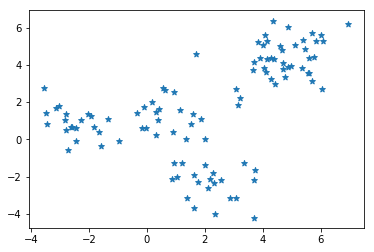

In [66]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
np.random.seed(0)
X,y=make_blobs(n_samples=103,centers=[[4,4],[-2,1],[2,-3],[1,1],[5,5]],cluster_std=0.9)
plt.scatter(X[:,0],X[:,1],marker='*')

<H1>Setting up k-means</H1>
<p>We now create the object of k-means clustering and find the centres. </p>

In [55]:
k_means=KMeans(init="k-means++",n_clusters=5,n_init=20)
k_means.fit(X)
k_means_centers=k_means.cluster_centers_

<H1>Pre-processing and Normalization</H1>
<p>We now standardize our data set.</p> 

In [40]:
from sklearn.preprocessing import StandardScaler
X=DF2.values[:,1:]
X=np.nan_to_num(X)
Clus_dataset=StandardScaler().fit_transform(X)

<H1>Modeling</H1>
<p>We now fit our clustering models and assign labels to our dataset.</p>

In [56]:
k_means=KMeans(init='k-means++',n_clusters=5,n_init=20)
k_means.fit(X)
labels=k_means.labels_
DF2['Labels']=labels
DF2.groupby('Labels').mean()

,Latitude,Longitude,Central Toronto,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Scarborough,...,Central Toronto,Downtown Toronto,East Toronto,East York,Etobicoke,Mississauga,North York,Scarborough,West Toronto,York
Labels,,,,,,,,,,,,,,,,,,,,,
0,43.719718,-79.377157,0.111111,0.166667,0.055556,0.000000,0.222222,0.000000,0.333333,0.055556,...,0.111111,0.166667,0.055556,0.000000,0.222222,0.000000,0.333333,0.055556,0.000000,0.055556
1,43.695326,-79.400966,0.105263,0.157895,0.052632,0.105263,0.105263,0.000000,0.368421,0.105263,...,0.105263,0.157895,0.052632,0.105263,0.105263,0.000000,0.368421,0.105263,0.000000,0.000000
2,43.688200,-79.439736,0.047619,0.285714,0.047619,0.047619,0.095238,0.047619,0.142857,0.142857,...,0.047619,0.285714,0.047619,0.047619,0.095238,0.047619,0.142857,0.142857,0.095238,0.047619
3,43.711828,-79.386119,0.047619,0.190476,0.047619,0.000000,0.095238,0.000000,0.190476,0.285714,...,0.047619,0.190476,0.047619,0.000000,0.095238,0.000000,0.190476,0.285714,0.142857,0.000000
4,43.708662,-79.381525,0.125000,0.125000,0.041667,0.083333,0.083333,0.000000,0.166667,0.208333,...,0.125000,0.125000,0.041667,0.083333,0.083333,0.000000,0.166667,0.208333,0.041667,0.125000


<H1>Visualization/Plotting</H1>
<p>Finally, we plot the scatter plot of dataset into their respected clusters as per the labels assigned to them.</p>

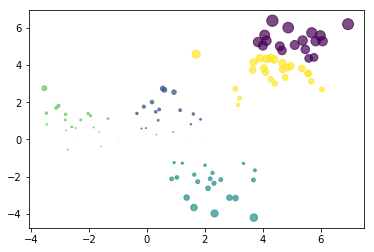

In [64]:
import matplotlib.pyplot as plt
area=np.pi*(X[:,1])**2
plt.scatter(X[:,0],X[:,1],s=area,c=labels.astype(np.float),alpha=0.7)
plt.show()